<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/NN_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 인공신경망


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


### **데이터 구성하기**

In [9]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [12]:
df_raw.loc[df_raw['diagnosis'] == '양성', 'diagnosis'] = 1
df_raw.loc[df_raw['diagnosis'] == '음성', 'diagnosis'] = 0

df_raw['diagnosis'] = df_raw['diagnosis'].astype(int)

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [14]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [16]:
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis', axis = 1, inplace = False)

In [19]:
print(df_raw_y.shape)
df_raw_y.head()

(320,)


0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
print(df_raw_x.shape)
df_raw_x.head()

(320, 30)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [37]:
v_feature_name = df_raw_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [38]:
df_scaled_train_x, df_scaled_test_x, df_train_y, df_test_y = train_test_split(df_scaled,
                                                                              df_raw_y,
                                                                              test_size = 0.4,
                                                                              random_state = 1234)

print('train x 크기 : {}'.format(df_scaled_train_x.shape))
print('test x 크기 : {}'.format(df_scaled_test_x.shape))
print('train y 크기 : {}'.format(df_train_y.shape))
print('test y 크기 : {}'.format(df_test_y.shape))

train x 크기 : (192, 30)
test x 크기 : (128, 30)
train y 크기 : (192,)
test y 크기 : (128,)


### **MLP 모델 생성하기**

In [39]:
nn_uncustomized = MLPClassifier(random_state =1234)
nn_uncustomized.fit(df_scaled_train_x, df_train_y)

print('Accuracy on train set : {}'.format(nn_uncustomized.score(df_scaled_train_x, df_train_y).round(3)))
print('Accuracy on test set : {}'.format(nn_uncustomized.score(df_scaled_test_x, df_test_y).round(3)))

Accuracy on train set : 0.995
Accuracy on test set : 0.953


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


해당 MLP 모델은 train과 test 데이터에 대해 각각 99.5%, 95.3%의 설명력을 갖는다.

### **모델 파라미터 변경하기 : Hidden Layer**

In [43]:
train_accuracy = []; test_accuracy = []
para_hidden = [hidden * 20 for hidden in range(1,8)]

for v_hidden in para_hidden :
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['hidden_layer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [44]:
df_accuracy_hidden.round(3)

,hidden_layer,TrainAccuracy,TestAccuracy
0,20,0.995,0.938
1,40,0.995,0.945
2,60,0.995,0.945
3,80,0.995,0.938
4,100,0.995,0.953
5,120,0.995,0.953
6,140,0.995,0.953


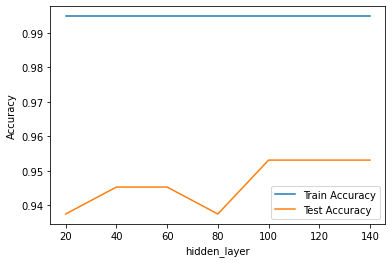

In [45]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('hidden_layer')
plt.legend()
plt.show()

- hidden layer가 증가하여도 모델의 성능에 큰 변화가 없다.
- test accuracy가 0.953, train accuracy가 0.995인 **hidden_layer_sizes = 100**을 선택한다.

### **모델 파라미터 변경하기 : Activation Function**

In [49]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function :
    nn = MLPClassifier(hidden_layer_sizes = (100,100),
                       activation = v_function,
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [50]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.938
1,tanh,1.000,0.945
2,relu,1.000,0.945


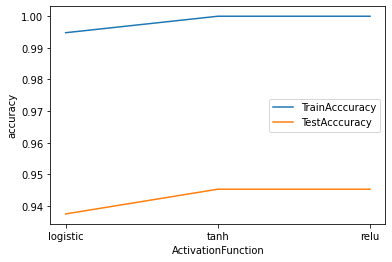

In [51]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'TrainAcccuracy')
plt.plot(para_function, test_accuracy, linestyle = '-', label = 'TestAcccuracy')
plt.ylabel('accuracy'); plt.xlabel('ActivationFunction')
plt.legend()
plt.show()

- 활성화 함수가 logistic일 때에 비해 tanh, relu일 때 모델의 성능이 향상되지만, train 데이터에 대해 과대적합의 현상이 발견되고 있는 것으로 보인다.
- testscore가 0.938, trainscore가 0.995인 **activation = logistic**을 선택한다.

### **모델 파라미터 변경하기 : Solver**


In [52]:
train_accuracy = []; test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver :
    nn = MLPClassifier(hidden_layer_sizes = (100,100),
                       activation = 'logistic',
                       solver = v_solver,
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [53]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.930
1,sgd,0.599,0.758
2,adam,0.995,0.938


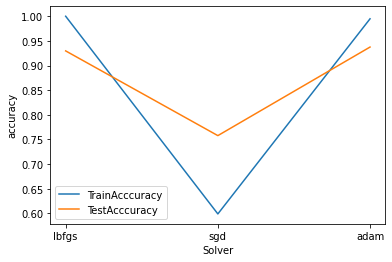

In [54]:
plt.plot(para_solver, train_accuracy, linestyle = '-', label = 'TrainAcccuracy')
plt.plot(para_solver, test_accuracy, linestyle = '-', label = 'TestAcccuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()
plt.show()

- 가중치가 lbfgs 또는 adam일 경우 sgd보다 더 좋은 모델 성능을 보여준다.
- lbfgs일 경우 train에 대한 모델의 성능이 100%이며, 이는 과대적합을 의미한다.
- testscore가 0.938, trainscore가 0.995인 **solver = adam**을 선택한다.

### **모델 파라미터 변경하기 : Mini Batch**


In [55]:
train_accuracy = []; test_accuracy = []
para_batch = [batch * 20 for batch in range(1,10)]

for v_batch in para_batch :
    nn = MLPClassifier(hidden_layer_sizes = (100,100),
                       activation = 'logistic',
                       solver = 'adam',
                       batch_size = v_batch,
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['MiniBatch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [58]:
df_accuracy_batch.round(3)

,MiniBatch,TrainAccuracy,TestAccuracy
0,20,1.000,0.953
1,40,0.995,0.953
2,60,0.995,0.945
3,80,0.995,0.945
4,100,0.995,0.945
5,120,0.995,0.945
6,140,0.995,0.945
7,160,0.995,0.945
8,180,0.995,0.938


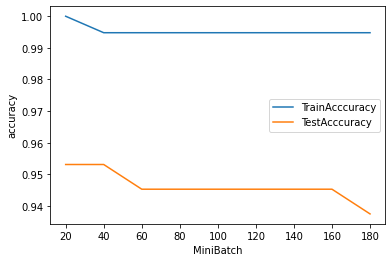

In [57]:
plt.plot(para_batch, train_accuracy, linestyle = '-', label = 'TrainAcccuracy')
plt.plot(para_batch, test_accuracy, linestyle = '-', label = 'TestAcccuracy')
plt.ylabel('accuracy'); plt.xlabel('MiniBatch')
plt.legend()
plt.show()

- mini batch가 커질수록 모델의 성능이 감소하거나 영향을 거의 주지 않는다.
- 모델의 성능을 최대로 끌어올리도록 mini batch가 작은 값을 선택한다.
- testscore가 0.953, trainscore가 0.995인 **batch_size = 40**을 선택한다.

### **최종 모델 선택**

In [62]:
nn_final = MLPClassifier(hidden_layer_sizes = (100,100),
                         activation = 'logistic',
                         solver = 'adam',
                         batch_size = 40,
                         random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set : {}'.format(nn_final.score(df_scaled_train_x, df_train_y).round(3)))
print('Accuracy on test set : {}'.format(nn_final.score(df_scaled_test_x, df_test_y.round(3))))
print('Confusion matrix : \n'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.995
Accuracy on test set : 0.953125
Confusion matrix : 

              precision    recall  f1-score   support

           0      0.979     0.959     0.969        97
           1      0.879     0.935     0.906        31

    accuracy                          0.953       128
   macro avg      0.929     0.947     0.938       128
weighted avg      0.955     0.953     0.954       128



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


- train과 test 데이터에 대해 각각 99.5%, 95.3%의 정확도를 갖는다.
- 1(양성)에 대한 precision이 0.879로, 실제 양성인 데이터 중 약 90%가 양성으로 예측되었다.
- 1(양성)에 대한 recall이 0.935로, 양성으로 예측된 데이터 중 약 90%가 양성이다.
- 1(양성)에 대한 f1-score가 0.906으로, 모델의 전체적인 분류 성능이 우수하다고 결론지을 수 있다.